In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
batch_size = 128

transformTrain = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     torchvision.transforms.RandomHorizontalFlip(),
     torchvision.transforms.RandomCrop(32, padding=4, padding_mode='constant')])

transformEval = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataTrain = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transformTrain)

dataEval = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transformEval)

train_indices = list(range(len(dataTrain)))[:45000]
validation_indices = list(range(len(dataEval)))[45000:]

# Subsets of the whole train data using the sampled indices
trainset = torch.utils.data.Subset(dataTrain, train_indices)
validationset = torch.utils.data.Subset(dataEval, validation_indices)

# Dataloader using the created subsets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transformEval)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
len(validationset)

5000

In [4]:
print('Train set size: ', len(trainloader) * 4)
print('Validation set size: ', len(validationloader) * 4)
print('Test set size: ', len(testloader) * 4)

Train set size:  1408
Validation set size:  160
Test set size:  316


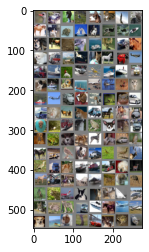

 bird   car  bird  bird horse   cat plane   cat horse   dog   cat  ship horse  bird  bird  ship   dog  deer  frog  bird  ship  deer   car horse   dog truck  deer horse   cat horse   dog plane truck  ship  bird   car  bird  ship  ship   car   dog  ship   dog  ship plane  deer  bird  bird  ship plane   car   cat   dog  frog  frog   car truck   cat  deer   cat truck horse  deer   car   dog  bird truck   cat  frog   dog  deer   car   dog  frog   cat   dog   dog   cat   car  bird horse plane  bird   dog truck  bird  bird  deer  bird truck  deer  ship truck truck   dog  deer horse truck horse truck plane  deer   dog  bird  deer  frog plane   dog   cat   cat  ship plane   cat  bird   dog   car  ship horse plane plane   dog  ship   dog  bird   car  deer  frog  ship


In [5]:
# The function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

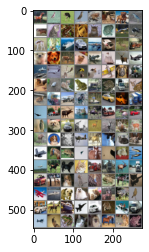

horse  bird  bird  bird  frog   cat   dog  bird horse   cat  frog   car   cat  frog plane  bird  deer   cat  ship   car plane   car  deer truck   dog   dog  deer   dog plane  ship  deer plane plane plane  deer  bird   cat plane   dog   car   cat  bird   dog  frog  deer  frog truck  deer  deer truck plane  frog  ship   car   car truck plane truck  deer  ship  deer truck  deer   car  bird   dog   car truck  deer  deer  bird  deer  deer   dog  deer plane  deer   cat   cat   cat plane horse  frog plane horse   cat   dog  bird plane horse   dog   cat truck truck  deer truck   car horse   dog   cat  bird  frog horse   cat plane  ship   dog   dog   cat horse  frog  bird   car horse  ship plane   car  frog  ship truck plane   cat  frog   cat   dog horse   dog  frog


In [6]:
# Get some random valldation images.
dataiter = iter(validationloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [7]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


In [8]:
class NetMod(nn.Module):
    def __init__(self):
        super(NetMod, self).__init__()
        self.avgpool = nn.AvgPool2d(kernel_size=(8,8))
        
        self.filter1 = 16
        self.filter2 = 32
        self.filter3 = 64
        
        self.convinit = nn.Conv2d(in_channels=3, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        
        self.conv1 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv6 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv7 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.conv8 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter1, kernel_size=3, stride=1, padding=1)
        self.projection1 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter2, kernel_size=1, stride=2)
        
        self.conv9 = nn.Conv2d(in_channels=self.filter1, out_channels=self.filter2, kernel_size=3, stride=2, padding=1)
        self.conv10 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv11 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv12 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv13 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv14 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv15 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.conv16 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter2, kernel_size=3, stride=1, padding=1)
        self.projection2 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter3, kernel_size=1, stride=2)
        
        self.conv17 = nn.Conv2d(in_channels=self.filter2, out_channels=self.filter3, kernel_size=3, stride=2, padding=1)
        self.conv18 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv19 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv20 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv21 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv22 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv23 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        self.conv24 = nn.Conv2d(in_channels=self.filter3, out_channels=self.filter3, kernel_size=3, stride=1, padding=1)
        
        self.batchnorminit = nn.BatchNorm2d(self.filter1)
        self.batchnorm1 = nn.BatchNorm2d(self.filter1)
        self.batchnorm2 = nn.BatchNorm2d(self.filter1)
        self.batchnorm3 = nn.BatchNorm2d(self.filter1)
        self.batchnorm4 = nn.BatchNorm2d(self.filter1)
        self.batchnorm5 = nn.BatchNorm2d(self.filter1)
        self.batchnorm6 = nn.BatchNorm2d(self.filter1)
        self.batchnorm7 = nn.BatchNorm2d(self.filter1)
        self.batchnorm8 = nn.BatchNorm2d(self.filter1)
        self.batchnorm9 = nn.BatchNorm2d(self.filter2)
        self.batchnorm10 = nn.BatchNorm2d(self.filter2)
        self.batchnorm11 = nn.BatchNorm2d(self.filter2)
        self.batchnorm12 = nn.BatchNorm2d(self.filter2)
        self.batchnorm13 = nn.BatchNorm2d(self.filter2)
        self.batchnorm14 = nn.BatchNorm2d(self.filter2)
        self.batchnorm15 = nn.BatchNorm2d(self.filter2)
        self.batchnorm16 = nn.BatchNorm2d(self.filter2)
        self.batchnorm17 = nn.BatchNorm2d(self.filter3)
        self.batchnorm18 = nn.BatchNorm2d(self.filter3)
        self.batchnorm19 = nn.BatchNorm2d(self.filter3)
        self.batchnorm20 = nn.BatchNorm2d(self.filter3)
        self.batchnorm21 = nn.BatchNorm2d(self.filter3)
        self.batchnorm22 = nn.BatchNorm2d(self.filter3)
        self.batchnorm23 = nn.BatchNorm2d(self.filter3)
        self.batchnorm24 = nn.BatchNorm2d(self.filter3)
        
        
        self.fc1 = nn.Linear(in_features=self.filter3, out_features=10)
        
    def forward(self, x):
        ##### n = 3
        ##### first 3x3 conv layer
        x = self.convinit(x)
        x = self.batchnorminit(x)
        x = F.relu(x)
        
        ##### 2n layers for 32x32 features
        x1 = self.conv1(x)
        x1 = self.batchnorm1(x1)
        x1 = F.relu(x1)
        
        x2 = self.conv2(x1)
        x2 = self.batchnorm2(x2)
        x2 = x2 + x
        x2 = F.relu(x2)
        
        x3 = self.conv3(x2)
        x3 = self.batchnorm3(x3)
        x3 = F.relu(x3)
        
        x4 = self.conv4(x3)
        x4 = self.batchnorm4(x4)
        x4 = x4 + x2
        x4 = F.relu(x4)
        
        x5 = self.conv5(x4)
        x5 = self.batchnorm5(x5)
        x5 = F.relu(x5)
        
        x6 = self.conv6(x5)
        x6 = self.batchnorm6(x6)
        x6 = x6 + x4
        x6 = F.relu(x6)
        
        x7 = self.conv7(x6)
        x7 = self.batchnorm7(x7)
        x7 = F.relu(x7)
        
        x8 = self.conv8(x7)
        x8 = self.batchnorm8(x8)
        x8 = x8 + x6
        x8 = F.relu(x8)
        
        ##### 2n layers for 16x16 features
        x9 = self.conv9(x8)
        x9 = self.batchnorm9(x9)
        x9 = F.relu(x9)
        
        x10 = self.conv10(x9)
        x10 = self.batchnorm10(x10)
        x10 = x10 + self.projection1(x8)
        x10 = F.relu(x10)
        
        x11 = self.conv11(x10)
        x11 = self.batchnorm11(x11)
        x11 = F.relu(x11)
        
        x12 = self.conv12(x11)
        x12 = self.batchnorm12(x12)
        x12 = x12 + x10
        x12 = F.relu(x12)
        
        x13 = self.conv13(x12)
        x13 = self.batchnorm13(x13)
        x13 = F.relu(x13)
        
        x14 = self.conv14(x13)
        x14 = self.batchnorm14(x14)
        x14 = x14 + x12
        x14 = F.relu(x14)
        
        x15 = self.conv15(x14)
        x15 = self.batchnorm15(x15)
        x15 = F.relu(x15)
        
        x16 = self.conv16(x15)
        x16 = self.batchnorm16(x16)
        x16 = x16 + x14
        x16 = F.relu(x16)
        
        #### 2n layers for 8x8 features
        x17 = self.conv17(x16)
        x17 = self.batchnorm17(x17)
        x17 = F.relu(x17)
        
        x18 = self.conv18(x17)
        x18 = self.batchnorm18(x18)
        x18 = x18 + self.projection2(x16)
        x18 = F.relu(x18)
        
        x19 = self.conv19(x18)
        x19 = self.batchnorm19(x19)
        x19 = F.relu(x19)
        
        x20 = self.conv20(x19)
        x20 = self.batchnorm20(x20)
        x20 = x20 + x18
        x20 = F.relu(x20)
        
        x21 = self.conv21(x20)
        x21 = self.batchnorm21(x21)
        x21 = F.relu(x21)
        
        x22 = self.conv22(x21)
        x22 = self.batchnorm22(x22)
        x22 = x22 + x20
        x22 = F.relu(x22)
        
        x23 = self.conv23(x22)
        x23 = self.batchnorm23(x23)
        x23 = F.relu(x23)
        
        x24 = self.conv24(x23)
        x24 = self.batchnorm24(x24)
        x24 = x24 + x22
        x24 = F.relu(x24)
        
        # avg pool and linear layer
        x25 = self.avgpool(x24)
        x25 = torch.flatten(x25, 1)
        x25 = self.fc1(x25)
        return x25

net = NetMod()     # Create the network instance.
net.to(device)  # Move the network parameters to the specified device.

NetMod(
  (avgpool): AvgPool2d(kernel_size=(8, 8), stride=(8, 8), padding=0)
  (convinit): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (projection1): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2))
  (conv9): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (con

In [9]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', patience=2, threshold=0.01, min_lr=0.00001, verbose=True)

In [10]:
avg_losses = []   # Avg. losses.
epochs = 30       # Total epochs.
print_freq = 100  # Print frequency.
lr_list = set()
valid_losses = []
train_losses = []

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    validation_loss = 0.0
    train_loss = 0.0
    
    net.train()
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        train_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq    
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

    net.eval()
    with torch.no_grad():
        for i, data in enumerate(validationloader, 0):
            # Get the inputs.
            inputs, labels = data

            # Move the inputs to the specified device.
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward step.
            outputs = net(inputs)
            loss = loss_func(outputs, labels)
            validation_loss += loss.item()
    net.train()
    
    # If validation error no longer improve, divide the lr by 10
    scheduler.step(validation_loss)
    print('Validation Loss: ', validation_loss, '----', 'Train Loss: ', train_loss)
    valid_losses.append(validation_loss)
    train_losses.append(train_loss)
    lr_list.add(scheduler._last_lr[0])
                            

print('Finished Training.')
print('LR list: ', lr_list)

[epoch: 0, i:    99] avg mini-batch loss: 2.020845254659653
[epoch: 0, i:   199] avg mini-batch loss: 1.7433912134170533
[epoch: 0, i:   299] avg mini-batch loss: 1.6053083324432373
Validation Loss:  59.29566848278046 ---- Train Loss:  616.6424226760864
[epoch: 1, i:    99] avg mini-batch loss: 1.4300043666362763
[epoch: 1, i:   199] avg mini-batch loss: 1.3709983789920808
[epoch: 1, i:   299] avg mini-batch loss: 1.2769491696357727
Validation Loss:  79.61619138717651 ---- Train Loss:  469.5396981239319
[epoch: 2, i:    99] avg mini-batch loss: 1.1261359667778015
[epoch: 2, i:   199] avg mini-batch loss: 1.0815488755702973
[epoch: 2, i:   299] avg mini-batch loss: 1.0254151052236558
Validation Loss:  38.63270854949951 ---- Train Loss:  374.3086016178131
[epoch: 3, i:    99] avg mini-batch loss: 0.9460020208358765
[epoch: 3, i:   199] avg mini-batch loss: 0.903702336549759
[epoch: 3, i:   299] avg mini-batch loss: 0.8833968037366867
Validation Loss:  43.49955004453659 ---- Train Loss:  

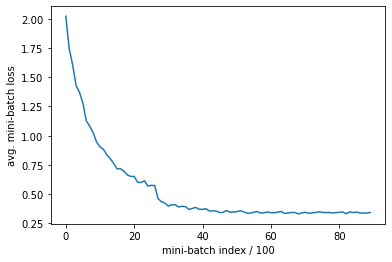

In [11]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

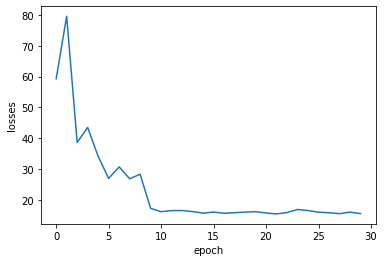

In [12]:
plt.plot(valid_losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

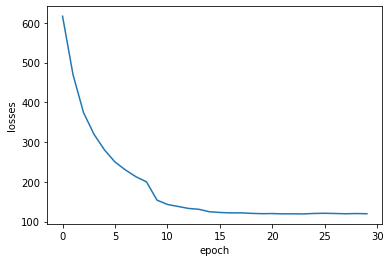

In [13]:
plt.plot(train_losses)
plt.xlabel('epoch')
plt.ylabel('losses')
plt.show()

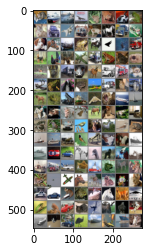

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat  frog  bird   car  bird   cat horse  bird  frog  ship  ship plane  bird truck   cat   cat  ship  ship   car   car horse  bird   dog  bird horse  ship truck plane   cat  ship  frog  deer  frog  frog plane plane horse  deer   dog  frog   cat   car   car   cat  frog  ship horse  deer plane  frog  bird   car   cat plane  deer  bird horse  ship   cat   car  bird  ship plane  ship   cat
Predicted:    cat  ship  ship  ship  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck  deer  bird   cat plane truck  frog  frog   dog  deer   dog tr

NetMod(
  (avgpool): AvgPool2d(kernel_size=(8, 8), stride=(8, 8), padding=0)
  (convinit): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (projection1): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2))
  (conv9): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv10): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (con

In [14]:
# Check several images.
net.eval()
with torch.no_grad():
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
    outputs = net(images.to(device))
    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(batch_size)))
net.train()

In [15]:
# Get test accuracy.
correct = 0
total = 0

net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
#         print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
#         print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(batch_size)))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

net.train()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %


In [16]:
total

10000

In [17]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(batch_size):
            if i == len(labels):
                break
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 86 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 69 %
Accuracy of  deer : 85 %
Accuracy of   dog : 76 %
Accuracy of  frog : 88 %
Accuracy of horse : 89 %
Accuracy of  ship : 94 %
Accuracy of truck : 92 %
